# **GLASS TYPE IDENTIFICATION CLASSIFICATION**

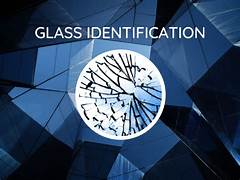

**Introduction**

This data set contain 214 instances, each corresponding to a glass/piece of glass. Each instance is described by 11 attributes. The features of this dataset contain information about different variants of glass (like materials used for their production and optical features) and the target variable is the resulting glass variant.

> As suggested by the data set description, this can be considered as a classification problem (unsupervised). The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence if it is correctly identified.



**Attributes**



1.  Id number: 1 to 214
2.  RI: refractive index
3.  Na: Sodium (unit measurement: weight percent in the corresponding oxide, as
are attributes 4-10)
4.  Mg: Magnesium
5.  Al: Aluminum
6.  Si: Silicon
7.  K: Potassium
8.  Ca: Calcium
9.  Ba: Barium
10. Fe: Iron

**Class Labels**

Type of glass: (class attribute)


* 1 building_windows_float_processed
* 2 building_windows_non_float_processed
* 3 vehicle_windows_float_processed
* 4 vehicle_windows_non_float_processed
(none in this database)
* 5 containers
* 6 tableware
* 7 headlamps

**Data Analysis**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#create a dataframe from dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset1/glass.csv')

In [3]:
#check initial 5 records
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
#Stats behind our dataframe
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
#Correlation of dataframe between all columns
df.corr()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [7]:
#Check and remove duplicates
df.duplicated().sum()
df.drop_duplicates(keep=False, inplace=True)

In [8]:
#Check the null values in dataframe
df.isna().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

Remove 'Id' column because this is not really useful for our model,and if we don't remove it our model consider it as real value and make wrong predictions.

In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Exploratory Data Analysis (EDA)**

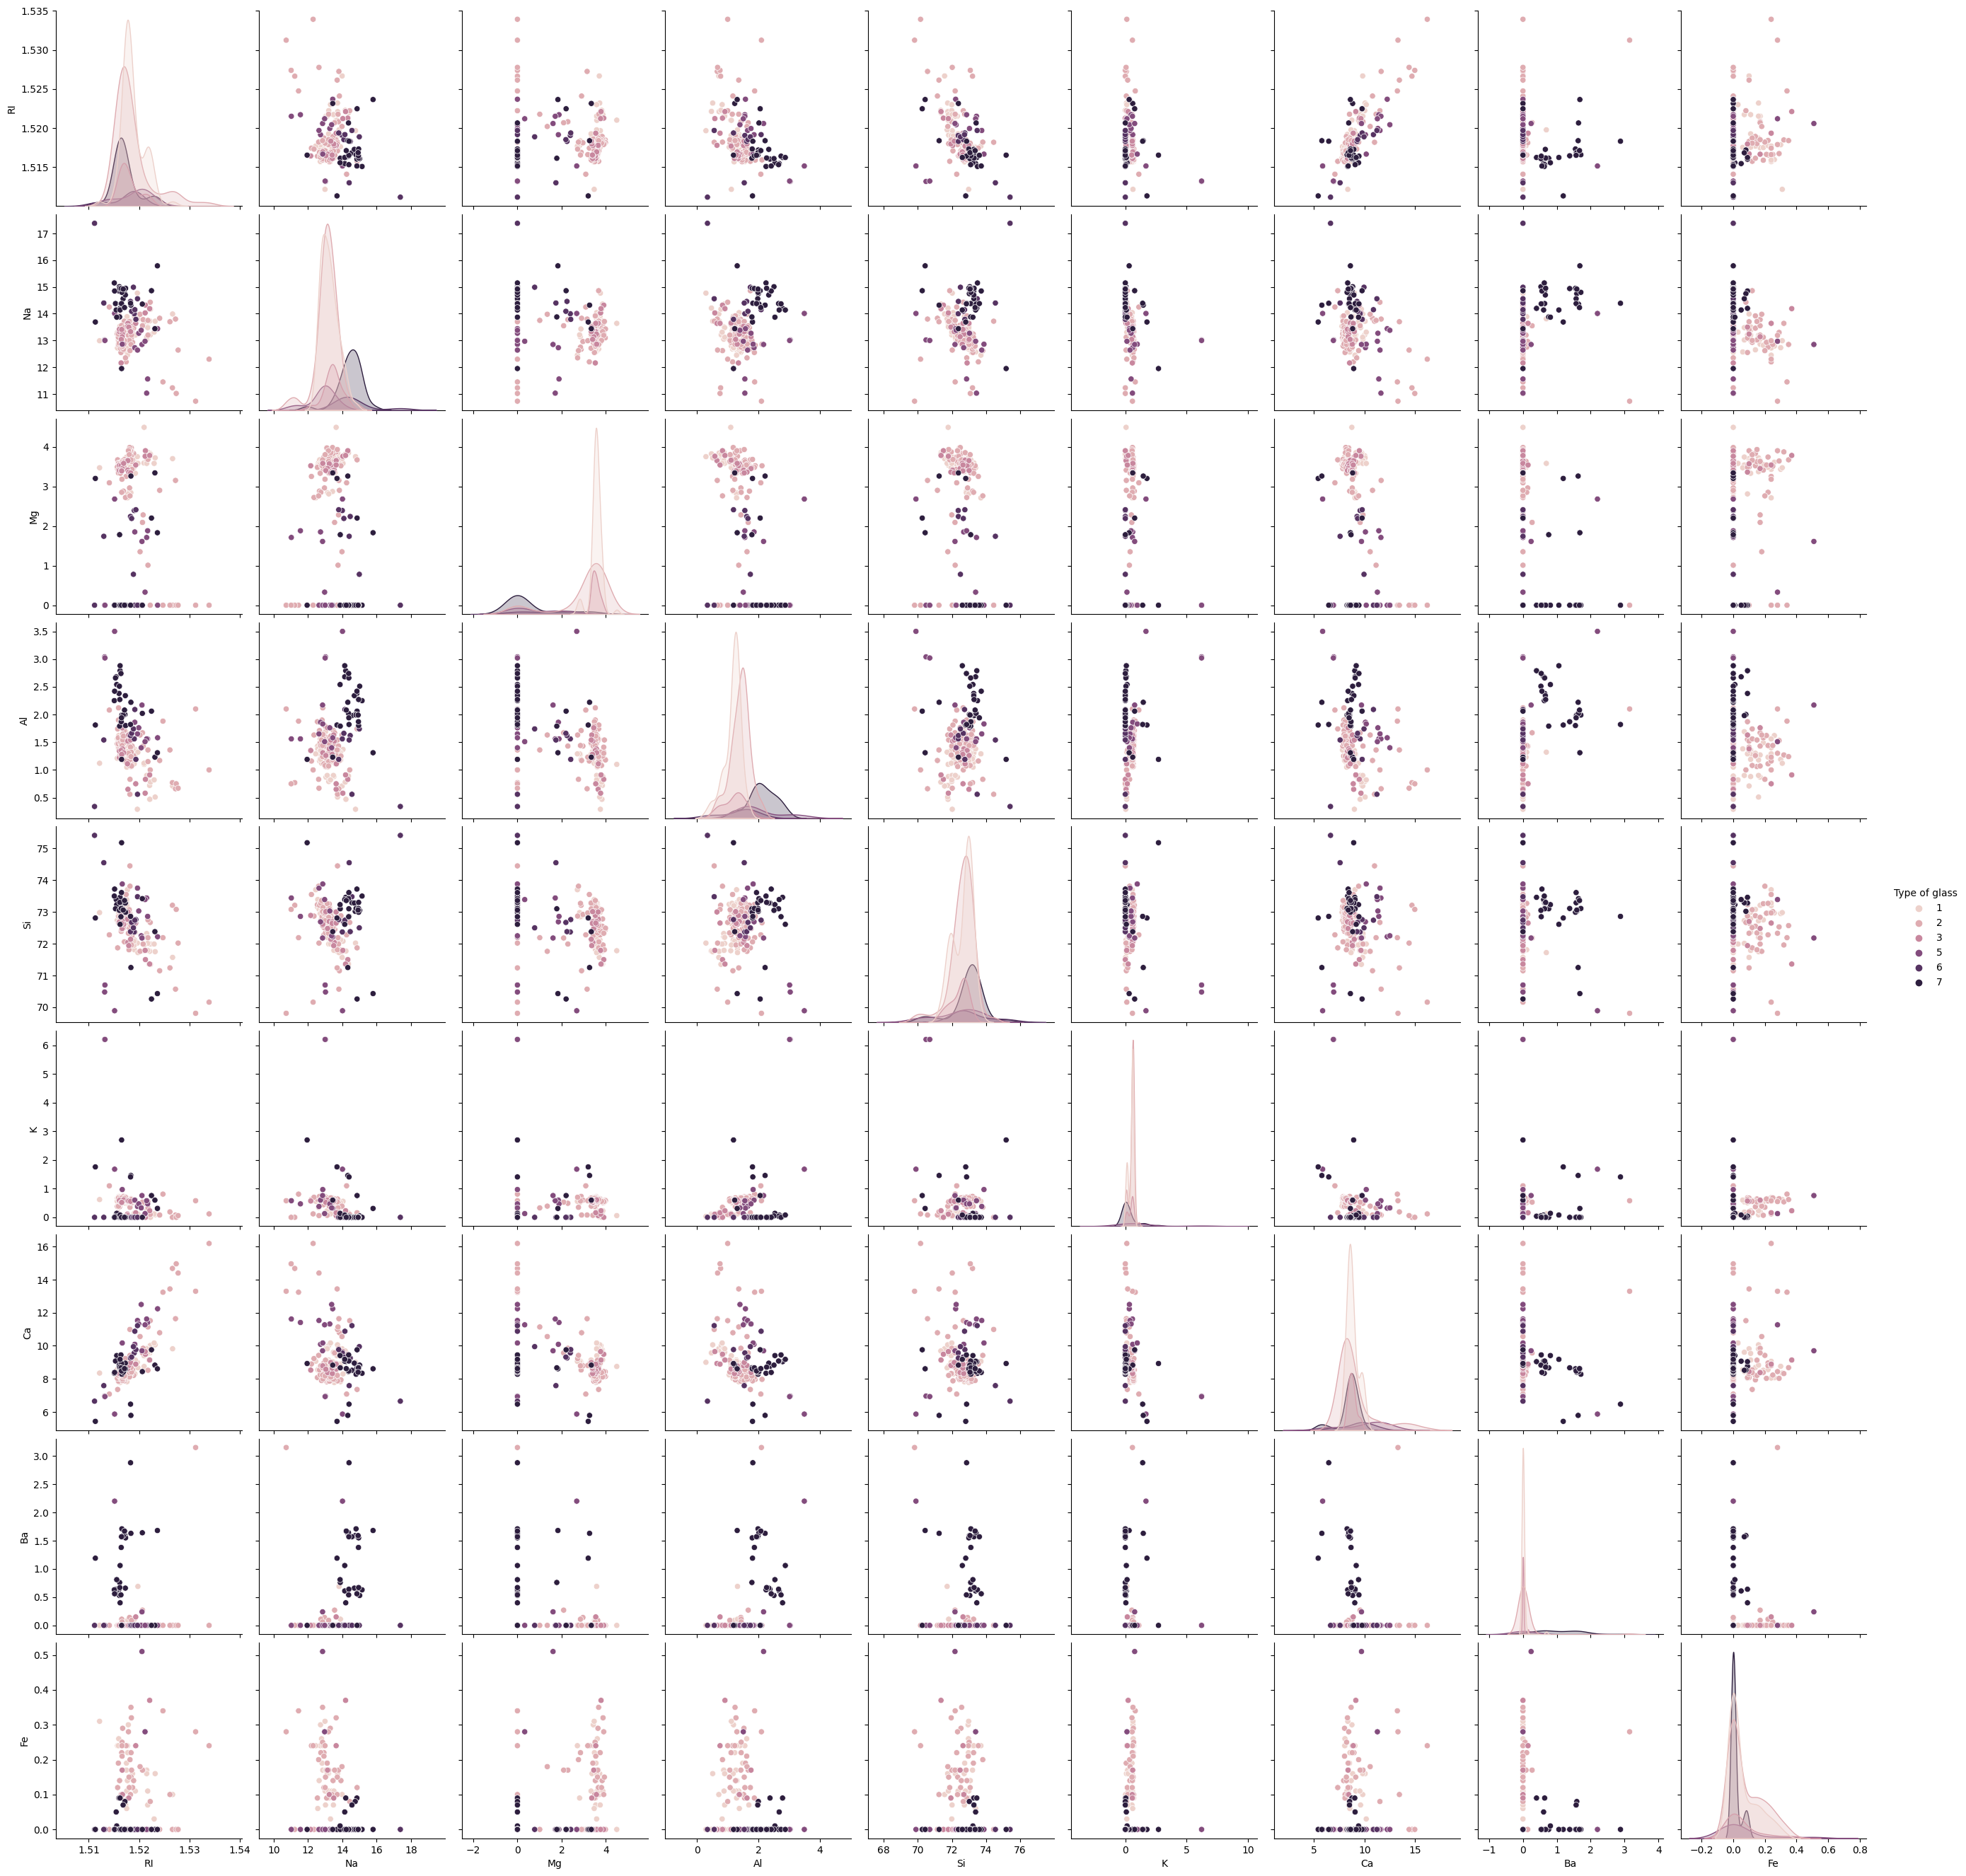

In [11]:
#Let's create a pairplot for normal analysis of complete data
sns.pairplot(df,hue='Type of glass',height=3)

Text(0.5, 1.02, 'Feature Distribution')

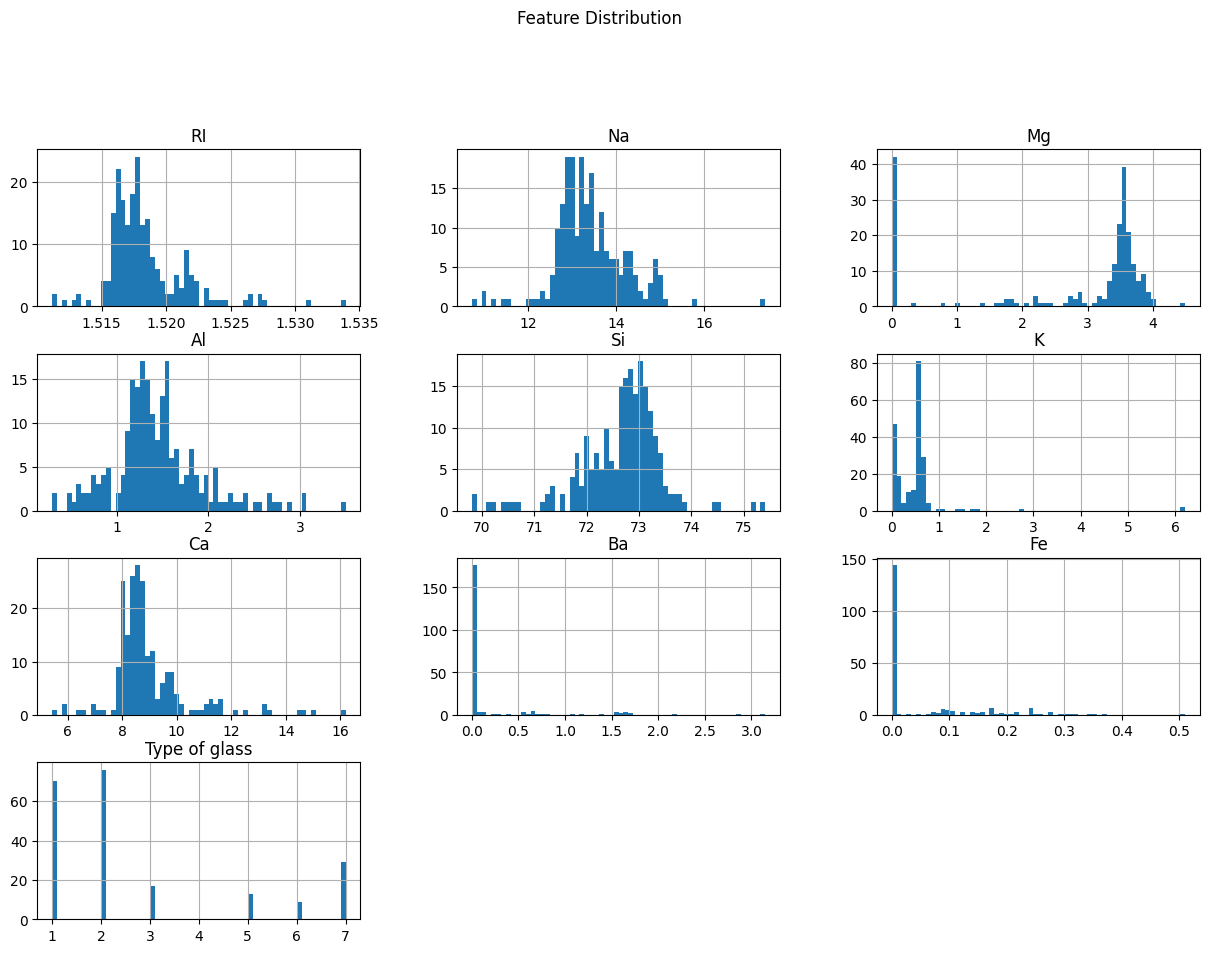

In [12]:
#Check the distribution of dataset features
df.hist(bins=60,figsize=(15,10))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

**Observation:**None of the features are normally distributed

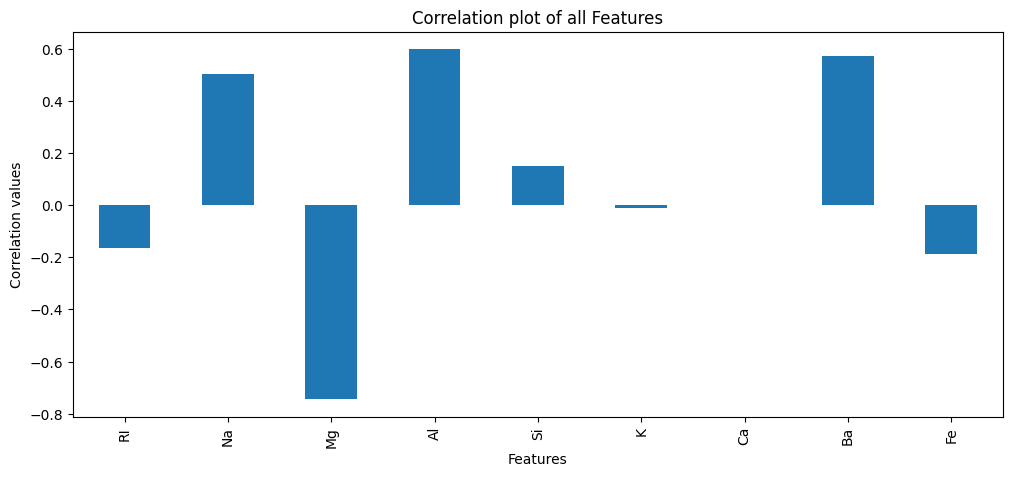

In [13]:
#Checking all the features correlation with respect to the target variable
plt.figure(figsize=(12,5))

#plot correlation
df.corr()['Type of glass'][:-1].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation values')
plt.title('Correlation plot of all Features')
plt.show()

Observation: Correlation is less for the features 'RI', 'Mg' and 'Fe'.

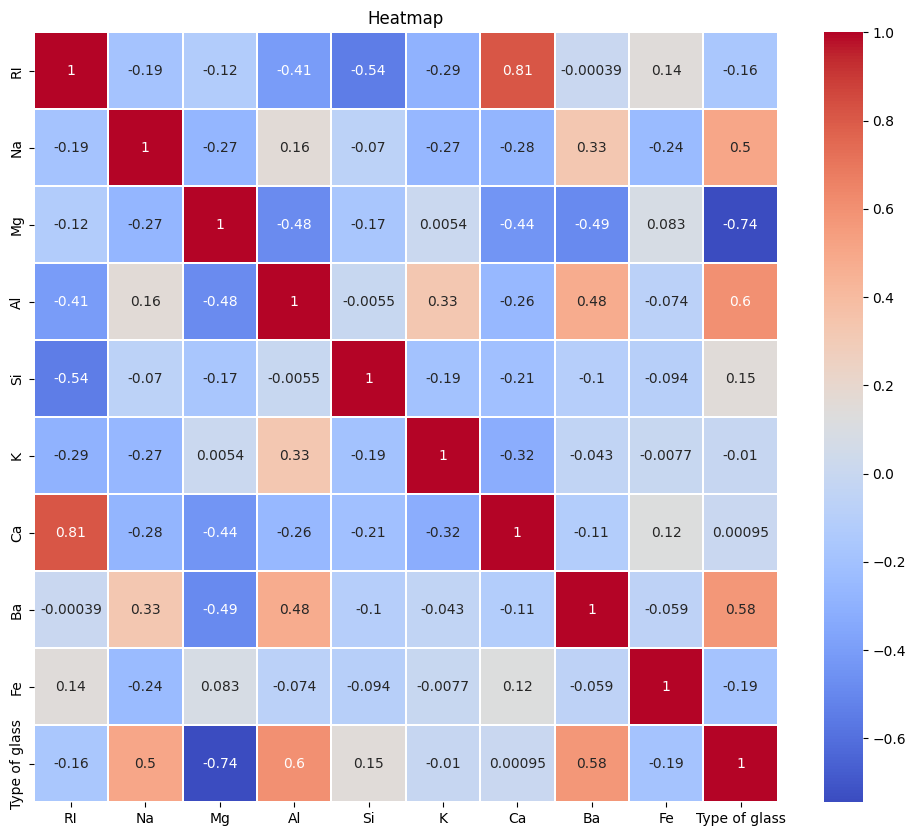

In [14]:
#Create a heatmap to visualize the correlation between all features
plt.figure(figsize=(12,10))
#Create a variable for correlation
df_corr=df.corr(method='pearson')

#plot heatmap
sns.heatmap(df_corr,annot=True,linecolor='white',linewidth=0.2,cmap='coolwarm')

plt.title('Heatmap')
plt.show()

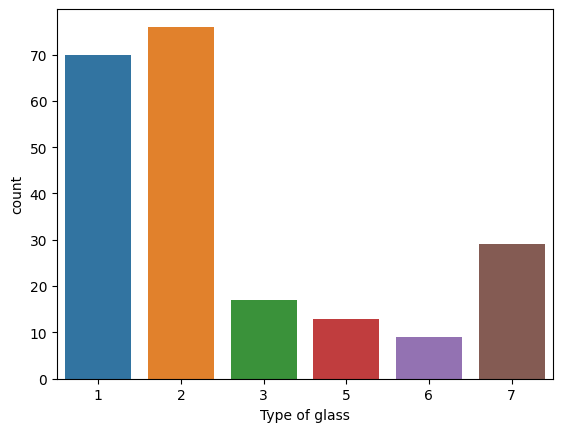

In [15]:
#Create a countplot for target variable 'Type of glass' column
sns.countplot(x='Type of glass',data=df)
plt.show()

Here we can able to see that the dataset is imbalanced which means that majority of glass types are of 1 and 2. So, this will effect our machine learning model. Hence, we are handling this imbalanced dataset using over sampling.

# Machine Learning Model

**Import all libraries used to build model**

In [16]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA
#!pip install shap
import shap
from sklearn.ensemble import IsolationForest

**Splitting of Data**

In [17]:
#Splitting data into dependent and independent variables

#independent variable
X=df.iloc[:,:-1]

#dependent variable
y=df.iloc[:,-1]

**Handling Imbalanced Data**

In [18]:
ros=RandomOverSampler(random_state=1)
X_res, y_res = ros.fit_resample(X, y)

print('Original dataset shape:',Counter(y))
print('Resample dataset shape:',Counter(y_res))

Original dataset shape: Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
Resample dataset shape: Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


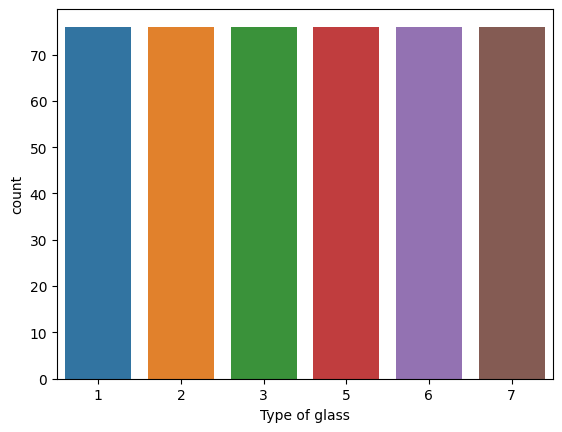

In [19]:
#Check the dataset classes after resampling
sns.countplot(x=y_res,data=df)
plt.show()

**Splitting data into training and test data**

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=1,test_size=0.3)

In [21]:
#Shape of all training and testing data variables
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((319, 9), (137, 9), (319,), (137,))

**Scaling Train and Test Data**

In [22]:
#Make an object for StandardScaler
scaler=StandardScaler()

#Scaling training data
X_train=scaler.fit_transform(X_train)

#Scaling testing data
X_test=scaler.transform(X_test)

In [23]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(319, 9) (319,)


**Making an Object**

In [24]:
#making an object for all machine learning algorithms
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
bc=BaggingClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)

**Accuracy Check for all Algorithms**

In [25]:
#making a list of all used ml algorithgms
ml_names=['K-Nearest Neighbors', 'Decision Tree','Random Forest', 'Bagging', 'Gradient Boosting']

#making a list of all used ml algorithms object
ml_object=[knn,dt,rf,bc,gb]

#using for loop to check the accuracy for all algorithms.
print('Accuracy of all Algorithms\n')
#using both lists in our loop
for i,j in zip(ml_names,ml_object):

  #training our all algorithms
  j.fit(X_train,y_train)

  #make predictions for all algorithms with the help of test data
  y_pred=j.predict(X_test)

  #printing accuracy for all algorithms
  print(f'{i}:{accuracy_score(y_test,y_pred)*100:.2f}%\n')

Accuracy of all Algorithms

K-Nearest Neighbors:83.21%

Decision Tree:91.24%

Random Forest:94.89%

Bagging:92.70%

Gradient Boosting:91.97%



Accuracy score is high for Random Forest Classifier. So, we choose Random Forest algorithm to make prediction.

**Log Loss Check for all Algorithms**

Log Loss, also known as Logarithmic Loss or Cross-Entropy Loss, is a commonly used evaluation metric for binary and multiclass classification problems especially in the context of machine learning and predictive modeling. It measures the performance of a classification model by quantifying the accuracy of the model's predicted probabilities compared to the true class labels.


> In Log Loss, a lower value indicates better performance. The ideal Log Loss value is 0, which means that the predicted probabilities perfectly match the true class labels. Higher values, on the other hand, indicate a less accurate model.

In [26]:
# making a list of all used ML algorithms
ml_names = [ 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Bagging','Gradient Boosting']

# making a list of all used ML algorithms objects
ml_object = [knn, dt, rf, bc,gb]

# using a for loop to check the Log Loss for all algorithms.
print('Log Loss of all Algorithms\n')
# using both lists in our loop
for i, j in zip(ml_names, ml_object):
    # training our all algorithms
    j.fit(X_train, y_train)
    # make predictions for all algorithms with the help of test data
    y_pred_prob = j.predict_proba(X_test)  # Use predict_proba to get predicted probabilities
    # calculate and print Log Loss for all algorithms
    logloss = log_loss(y_test, y_pred_prob)
    print(f'{i}: {logloss:.2f}\n')


Log Loss of all Algorithms

K-Nearest Neighbors: 0.79

Decision Tree: 3.16

Random Forest: 0.21

Bagging: 0.96

Gradient Boosting: 0.32



 Here Log loss value is minimum for Random Forest model.


# **Evaluation of Selected Algorithm**

**Hyperparameter Tuning**

> Hyperparameter tuning is the process of selecting the optimal set of hyperparameters for a machine learning model.



In [27]:
#Performing Hyperparameter tuning for more accurate performance

#Define a dictionary of hyperparameters and their possible values
params = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']         # Number of features to consider when looking for the best split
}
#Create a GridSearchCV object
ran_search = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5,scoring='accuracy')

#Fit the grid search to your training data
ran_search.fit(X_train, y_train)

#Get the best hyperparameters
best_params = ran_search.best_params_
print('Best Hyperparameters:',best_params)

#Get the best model
best_model=ran_search.best_estimator_

#Make predictions with thre best model
y_pred_rf=best_model.predict(X_test)

#Print accracy score after hyperparameter tuning
print('Accuracy:',accuracy_score(y_test,y_pred_rf)*100)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Accuracy: 94.8905109489051


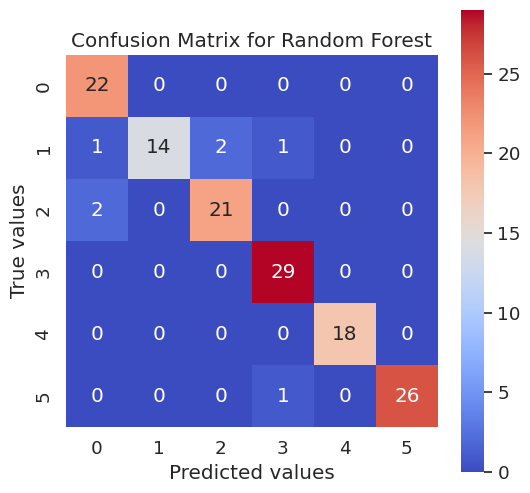

In [28]:
#making confusion matrix
cm=confusion_matrix(y_test,y_pred_rf)

#adjust the size of the confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)

#Create a heatmap which show the confusion matrix of the random forest model
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',square=True,xticklabels='auto')

plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# SHAP Plot

SHAP (SHapley Additive exPlanations) values are used to explain the output of a machine learning model, and the summary plot provides insights into feature importance and the impact of features on model predictions.

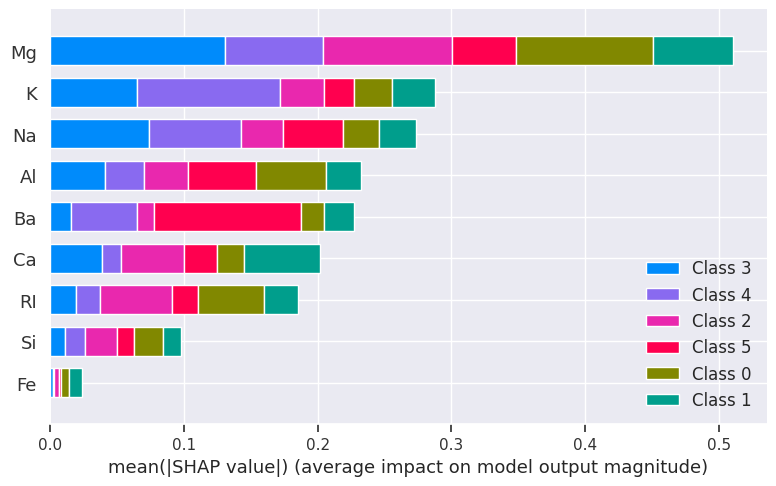

In [29]:
# Creating SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()

Observation:Each horizontal bar represents a feature from the dataset. The length of the bar indicates the magnitude of the feature's impact on predictions. Longer bars represent features with a greater impact. Features are ordered from top to bottom, with the most important feature at the top and the least important at the bottom.

**Prediction using new model**

In [30]:
y_new=rf.predict(scaler.transform([[1.52101,	13.64,	4.49,	1.10,	71.78,	0.06,	8.75,	0.00,	0.0]]))
y_new

array([1])

# Conclusion

In this glass type identification project, various machine learning algorithms were applied, and Random Forest emerged as the most accurate classifier. Through hyperparameter tuning, the model's performance was further enhanced. Notably, the use of SHAP plots allowed for in-depth model interpretation, revealing an uncorrelated feature as the most important, underscoring the model's ability to capture complex relationships. This project highlights the significance of model transparency and feature importance in real-world applications, providing valuable insights for glass manufacturing and quality control processes. To ensure practical utility, future steps should include assessing model generalization and exploring additional avenues for improvement.